# Tannis McCartney
## June 23, 2022
## Time Series Analysis - NS Housing Indicators

### Table of Contents
01 Import libraries

02 Import dataset

03 Wrangle data for time series analysis

04 Create line chart of data

05 Choose variable for time series analysis

06 Decompose data components

07 Test for stationarity

08 Stationarize the data

09 Check autocorrelations

# 01 Import libraries

In [1]:
# import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# 02 Import data

In [2]:
# Turn project folder path into a string
path = r'C:\Users\tmmcc\Google Drive\Data Analytics Bootcamp\6 Advanced Analytics and Dashboard Design\Nova Scotia Housing and Income'  

In [3]:
# Import NS housing market indicators
NSHousing = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'NSHousing_clustered.pkl'))
NSHousing.head()

dwelling,total_starts,rental_starts,co_op_and_unknown_starts,rental_vacancy_percent,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_employment,pct_change_unemployment,clusters,cluster
1990,5560.0,1107.0,332.0,3.8,0.3,5.1,4.7,3.3,910.500000,1.0,10.7,1,blue
1991,5173.0,1691.0,400.0,5.1,-0.2,6.1,4.5,2.8,915.000000,-1.2,12.1,1,blue
1992,4673.0,764.0,268.0,5.7,1.1,0.7,-0.8,1.9,919.500000,-3.1,13.1,1,blue
1993,4282.0,642.0,40.0,6.0,3.0,1.2,-0.5,1.3,923.900024,-0.6,14.3,2,cyan
1994,4748.0,671.0,140.0,6.7,2.8,1.1,-0.3,1.3,926.900024,1.7,13.5,1,blue


In [4]:
# Check shape of dataframe
NSHousing.shape

(27, 13)

# 03 Wrangle data for time series analysis

In [5]:
# Add new index
df = NSHousing.reset_index()
df.head()

dwelling,index,total_starts,rental_starts,co_op_and_unknown_starts,rental_vacancy_percent,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_employment,pct_change_unemployment,clusters,cluster
0,1990,5560.0,1107.0,332.0,3.8,0.3,5.1,4.7,3.3,910.500000,1.0,10.7,1,blue
1,1991,5173.0,1691.0,400.0,5.1,-0.2,6.1,4.5,2.8,915.000000,-1.2,12.1,1,blue
2,1992,4673.0,764.0,268.0,5.7,1.1,0.7,-0.8,1.9,919.500000,-3.1,13.1,1,blue
3,1993,4282.0,642.0,40.0,6.0,3.0,1.2,-0.5,1.3,923.900024,-0.6,14.3,2,cyan
4,1994,4748.0,671.0,140.0,6.7,2.8,1.1,-0.3,1.3,926.900024,1.7,13.5,1,blue


In [6]:
# Rename index column to year
df = df.rename(columns = {'index':'year'})
df.head()

dwelling,year,total_starts,rental_starts,co_op_and_unknown_starts,rental_vacancy_percent,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_employment,pct_change_unemployment,clusters,cluster
0,1990,5560.0,1107.0,332.0,3.8,0.3,5.1,4.7,3.3,910.500000,1.0,10.7,1,blue
1,1991,5173.0,1691.0,400.0,5.1,-0.2,6.1,4.5,2.8,915.000000,-1.2,12.1,1,blue
2,1992,4673.0,764.0,268.0,5.7,1.1,0.7,-0.8,1.9,919.500000,-3.1,13.1,1,blue
3,1993,4282.0,642.0,40.0,6.0,3.0,1.2,-0.5,1.3,923.900024,-0.6,14.3,2,cyan
4,1994,4748.0,671.0,140.0,6.7,2.8,1.1,-0.3,1.3,926.900024,1.7,13.5,1,blue


In [7]:
# Set year as index
from datetime import datetime

In [8]:
# Convert year column to datetime column
df['datetime'] = pd.to_datetime(df['year'])

In [9]:
# set datetime as index
df = df.set_index('datetime')

In [10]:
# drop year column
df.drop(['year'], axis=1, inplace=True)

In [11]:
# Check result
df.head()

dwelling,total_starts,rental_starts,co_op_and_unknown_starts,rental_vacancy_percent,pct_change_new_housing_price_index,pct_change_consumer_price_index,pct_change_owned_accommodation_costs,pct_change_rental_accommodation_costs,july_1_population_thousands,pct_change_employment,pct_change_unemployment,clusters,cluster
datetime,,,,,,,,,,,,,
1990-01-01,5560.0,1107.0,332.0,3.8,0.3,5.1,4.7,3.3,910.500000,1.0,10.7,1,blue
1991-01-01,5173.0,1691.0,400.0,5.1,-0.2,6.1,4.5,2.8,915.000000,-1.2,12.1,1,blue
1992-01-01,4673.0,764.0,268.0,5.7,1.1,0.7,-0.8,1.9,919.500000,-3.1,13.1,1,blue
1993-01-01,4282.0,642.0,40.0,6.0,3.0,1.2,-0.5,1.3,923.900024,-0.6,14.3,2,cyan
1994-01-01,4748.0,671.0,140.0,6.7,2.8,1.1,-0.3,1.3,926.900024,1.7,13.5,1,blue


# 04 Create a line chart of data

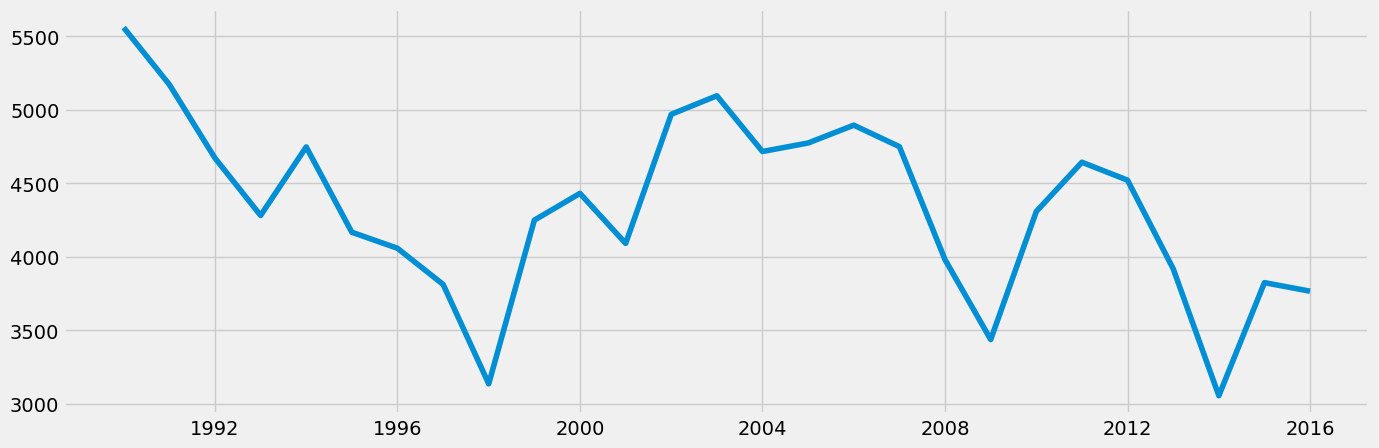

In [12]:
# Plot the total starts
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['total_starts'])
plt.show()

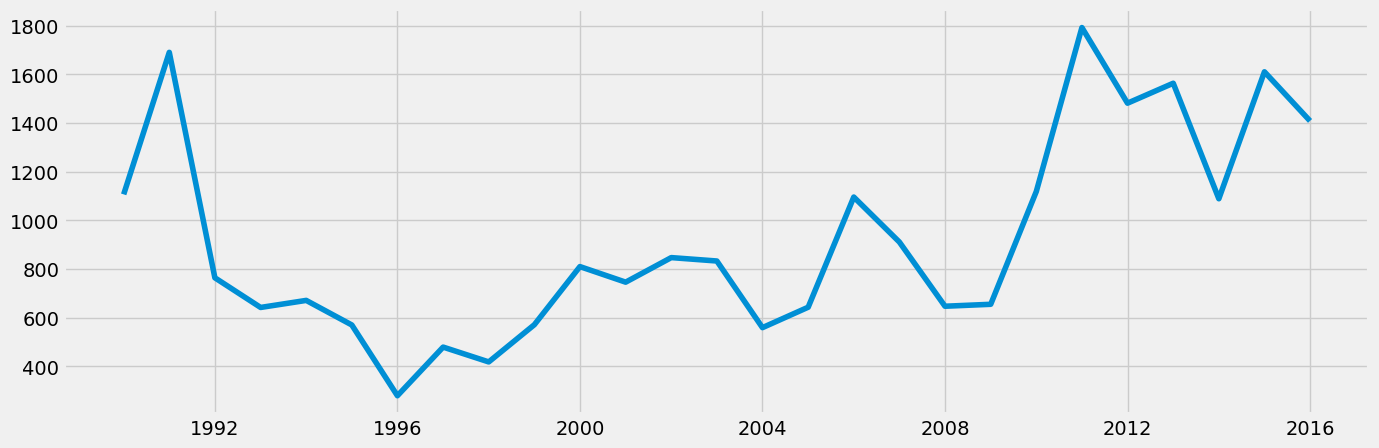

In [13]:
# Plot the rental starts
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['rental_starts'])
plt.show()

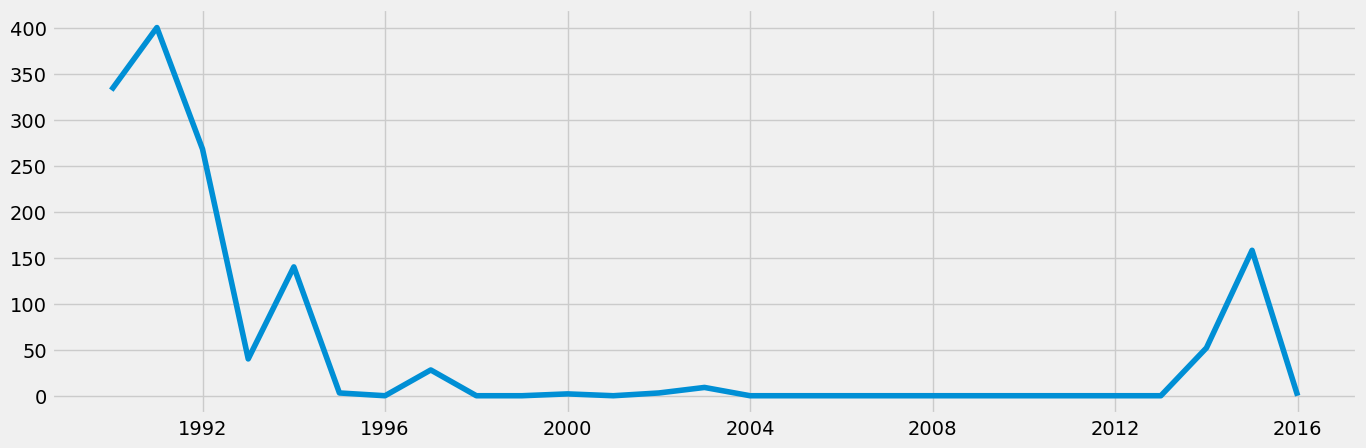

In [14]:
# Plot co-op and unknown starts
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['co_op_and_unknown_starts'])
plt.show()

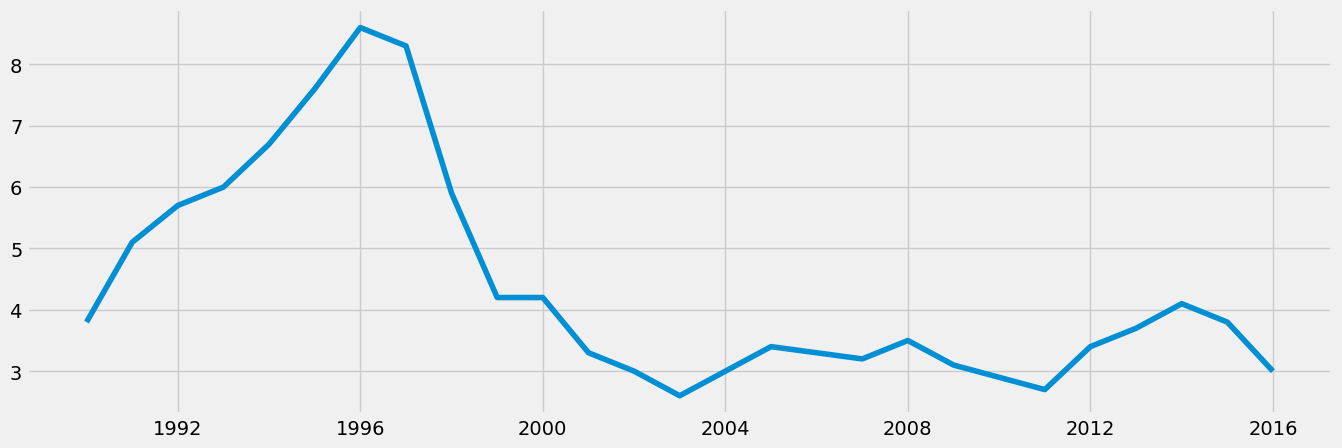

In [15]:
# Plot the rental vacancy percent
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['rental_vacancy_percent'])
plt.show()

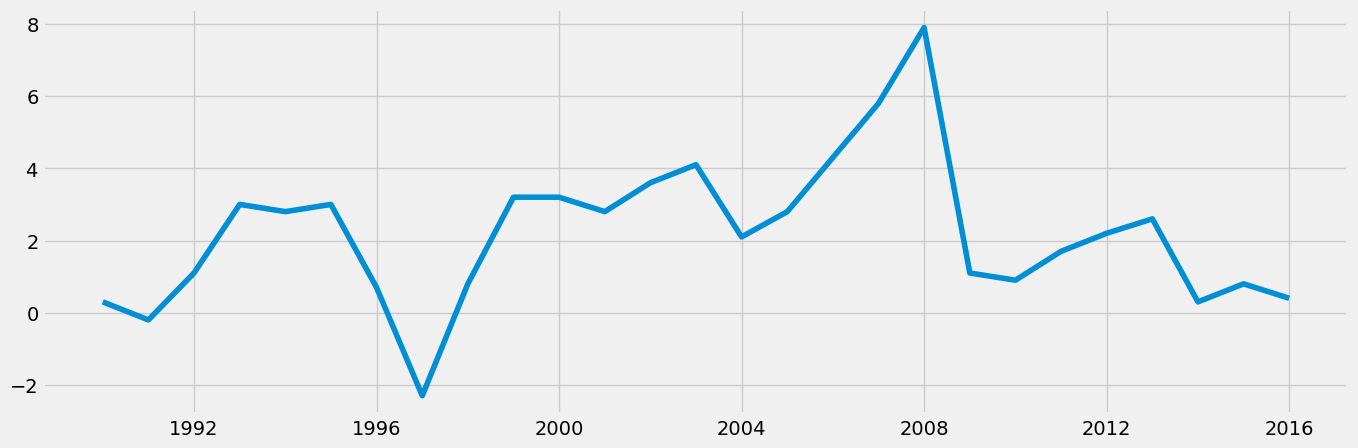

In [16]:
# Plot the % change in new housing price index
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['pct_change_new_housing_price_index'])
plt.show()

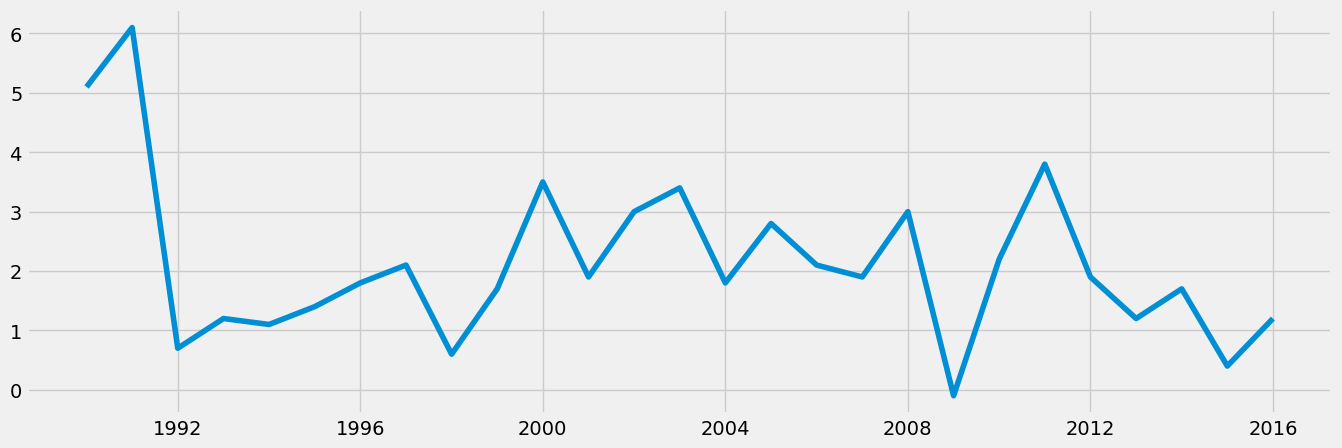

In [17]:
# Plot the % change in consumer price index
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['pct_change_consumer_price_index'])
plt.show()

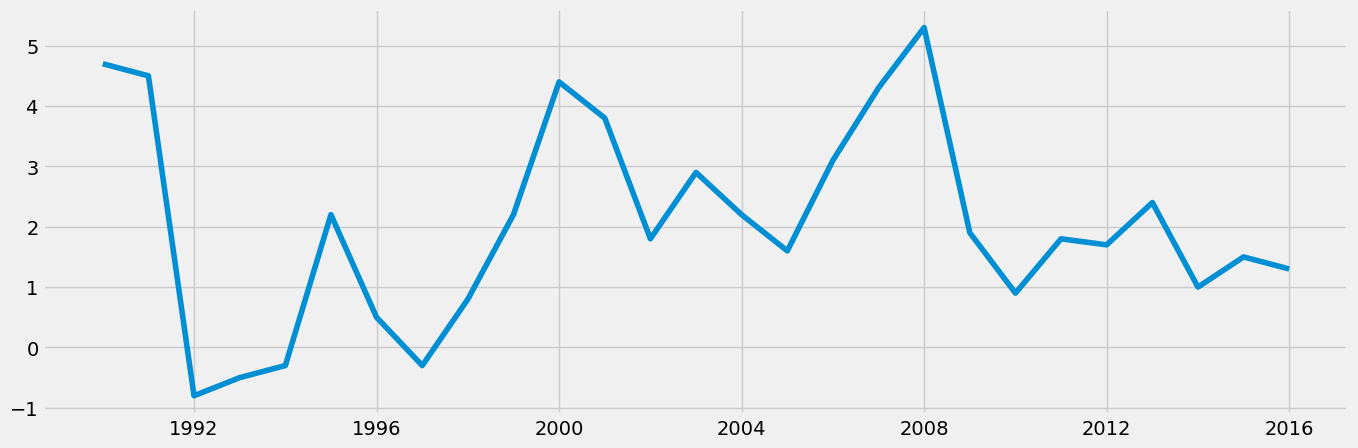

In [18]:
# Plot the % change in owned accommdation costs
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['pct_change_owned_accommodation_costs'])
plt.show()

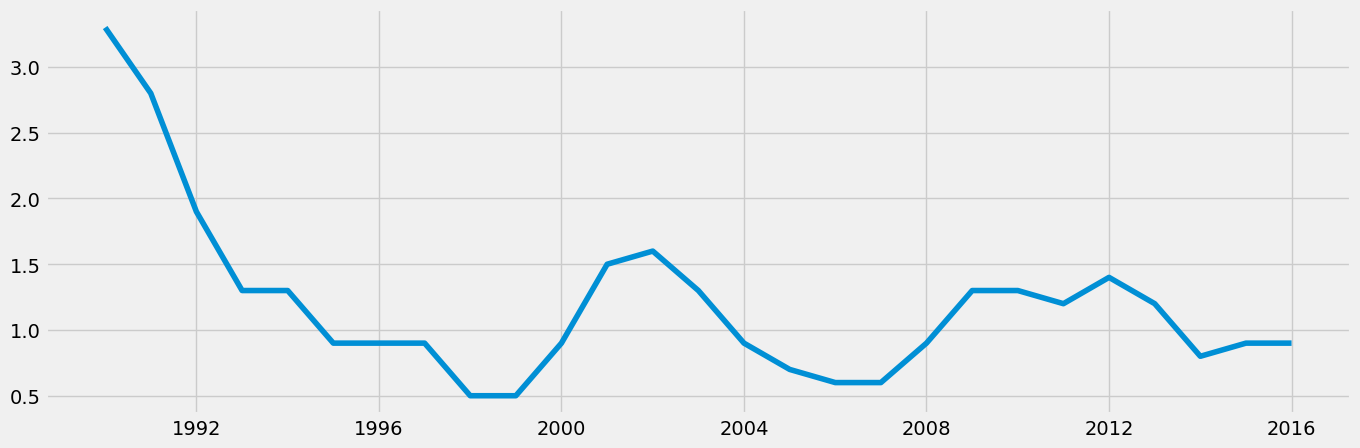

In [19]:
# Plot the % change in rental accommdation costs
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['pct_change_rental_accommodation_costs'])
plt.show()

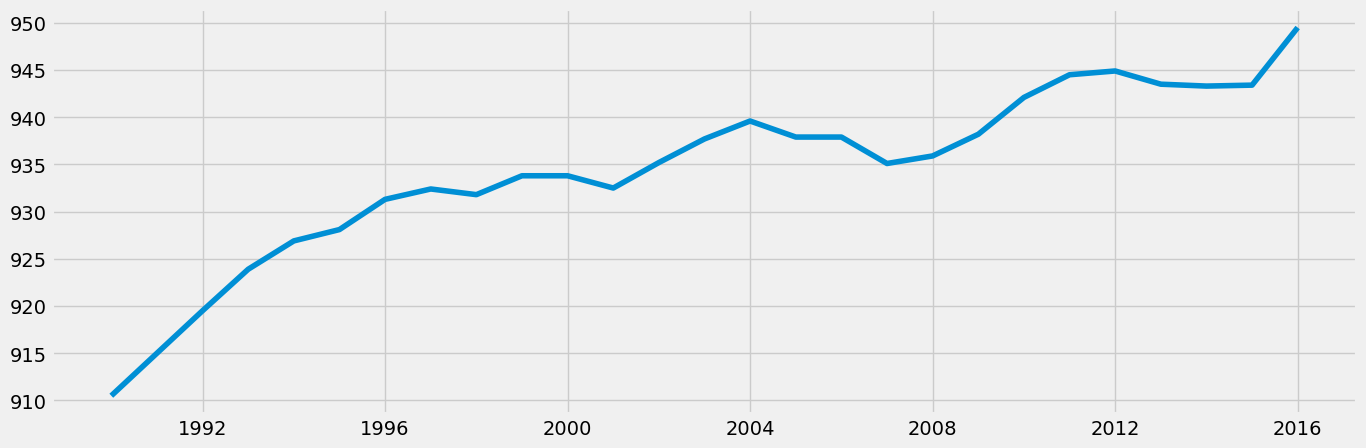

In [20]:
# Plot the population
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['july_1_population_thousands'])
plt.show()

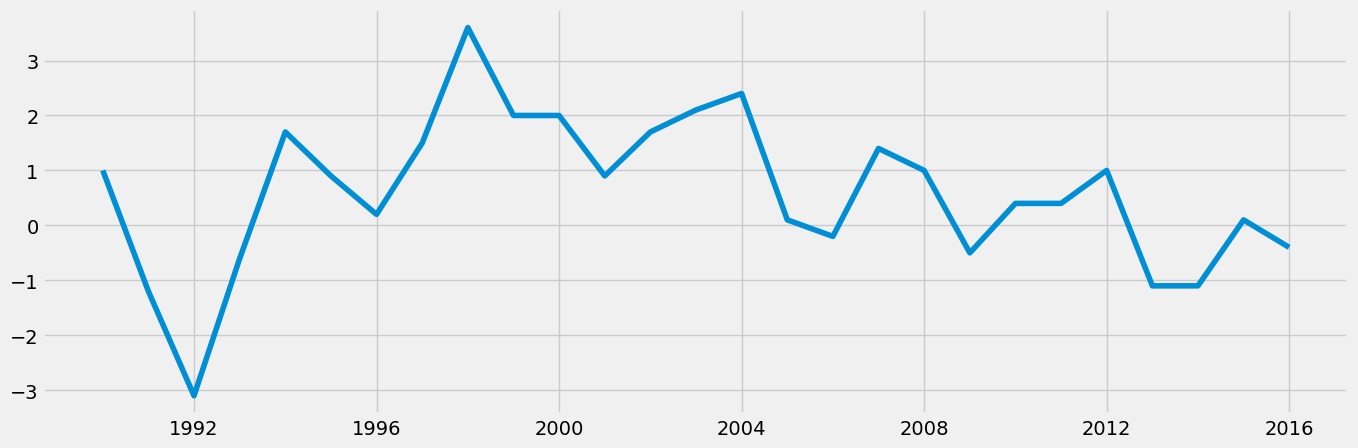

In [21]:
# Plot the % change in employment
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['pct_change_employment'])
plt.show()

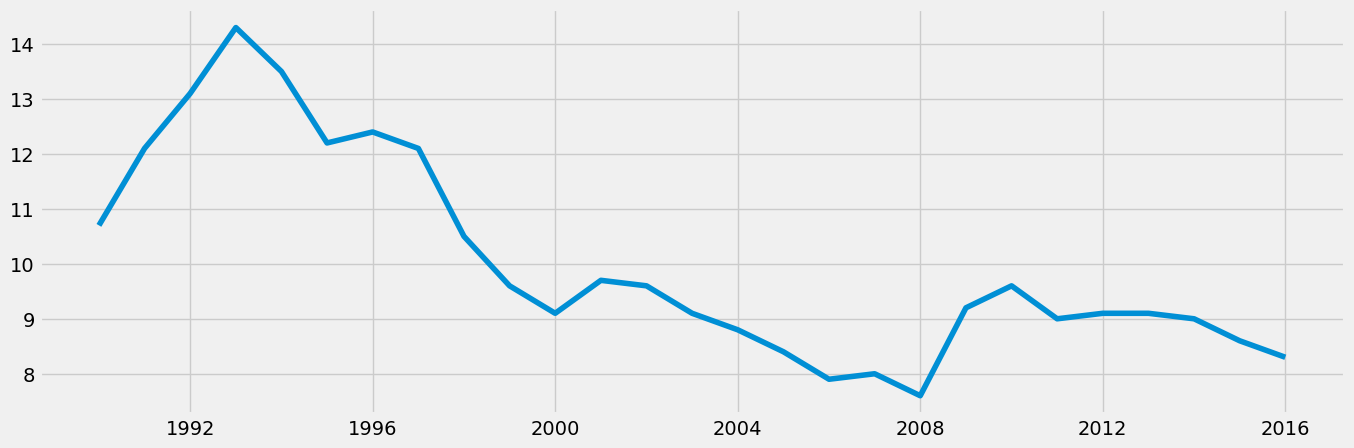

In [22]:
# Plot the % change in unemployment
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df['pct_change_unemployment'])
plt.show()

# 05 Choose variable for time series analysis

In [23]:
# Do a time series analysis of just the total_starts
data = df['total_starts'].to_frame()
data.head()

,total_starts
datetime,
1990-01-01,5560.0
1991-01-01,5173.0
1992-01-01,4673.0
1993-01-01,4282.0
1994-01-01,4748.0


In [24]:
# Check shape
data.shape

(27, 1)

In [25]:
# Check columns
data.columns

Index(['total_starts'], dtype='object')

In [26]:
# Check data type
type(data)

pandas.core.frame.DataFrame

# 06 Decompose data components

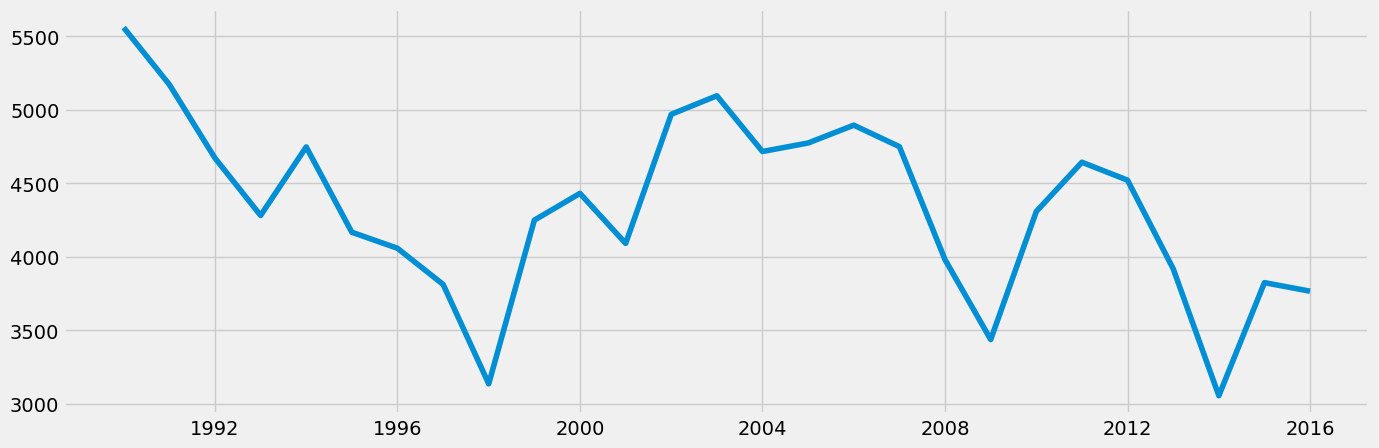

In [27]:
# Plot the total starts
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(data)
plt.show()

In [28]:
# Decompose the time series (additive model - data is more linear than non-linear)
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [29]:
# Define fixed size for all charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

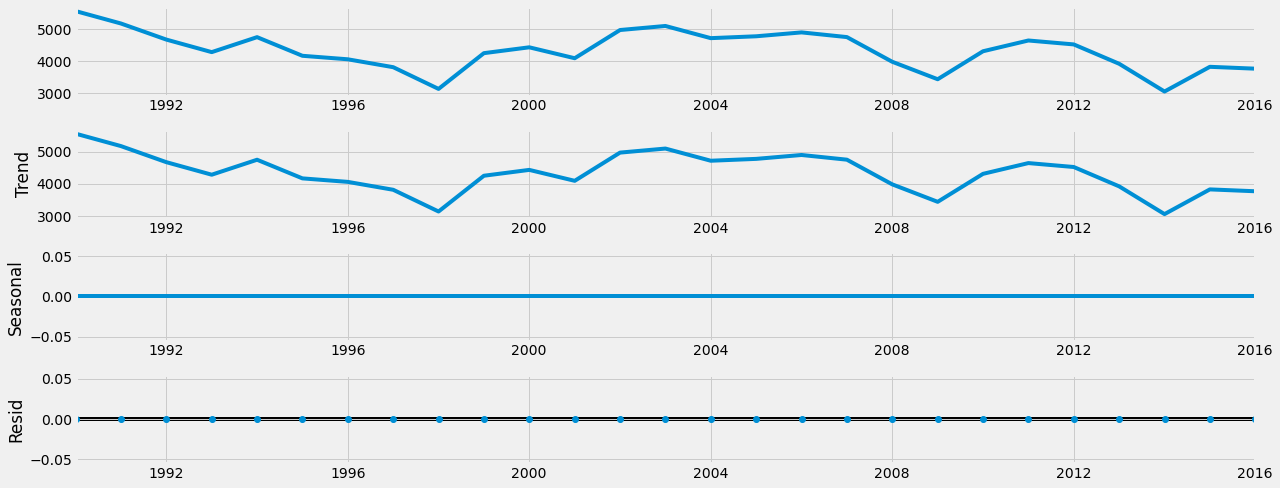

In [30]:
# Plot components
decomposition.plot()
plt.show()

The trend is linear from 1990-1998 (decreasing). Since then there was an approximately linear increase until 2003, and an overall decline since then (with a bit of a bubble between 2009 and 2014 which was likely related to economic stimulus following the 2008-2009 financial crisis).

The data has no seasonality. 

There is little-to-no noise in the data (trend and level are the same).

# 07 Test for stationarity

In [31]:
# Import adfuller() function
from statsmodels.tsa.stattools import adfuller

In [32]:
# Perform the Dickey-Fuller test
def dickey_fuller(timeseries): 
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(data['total_starts'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.968007
p-value                         0.037992
Number of Lags Used             0.000000
Number of Observations Used    26.000000
Critical Value (1%)            -3.711212
Critical Value (5%)            -2.981247
Critical Value (10%)           -2.630095
dtype: float64


The test statistic (-2.97) is larger than the critical value at 5% (-2.98), therefore the null hypothesis (there is a unit root) cannot be rejected and the data is non-stationary.

# 08 Stationarize the data

In [33]:
# Change the data to t - (t -1)
data_diff = data - data.shift(1) 

In [34]:
# Remove missing values in the shifted data
data_diff.dropna(inplace = True)

In [35]:
# Check data
data_diff.head()

,total_starts
datetime,
1991-01-01,-387.0
1992-01-01,-500.0
1993-01-01,-391.0
1994-01-01,466.0
1995-01-01,-580.0


In [36]:
# Check data columns
data_diff.columns

Index(['total_starts'], dtype='object')

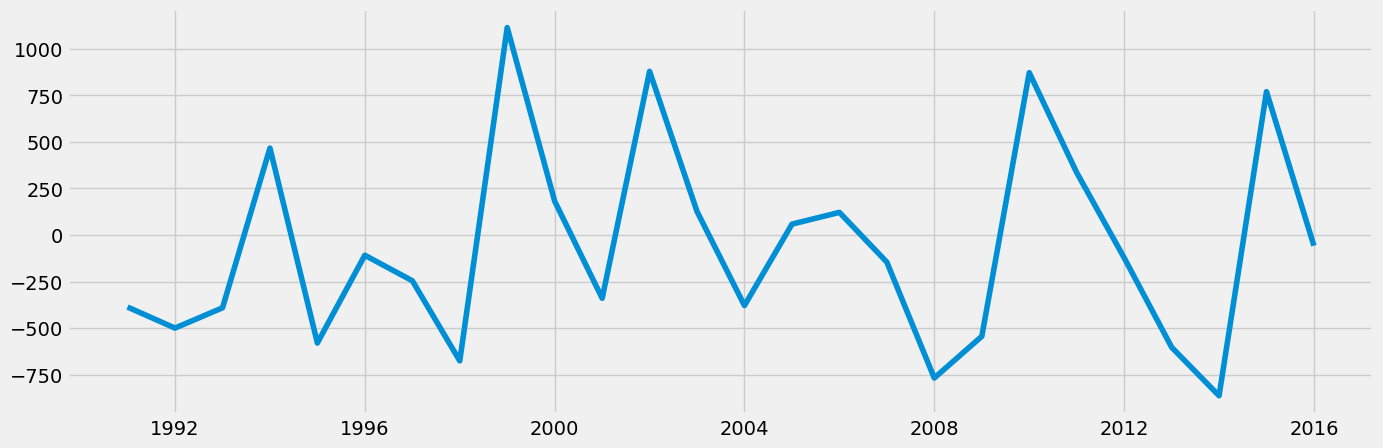

In [37]:
# See what differencing did to the time series
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
# Conduct the Dickey-Fuller test again
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.917344
p-value                         0.000032
Number of Lags Used             1.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


The test statistic (-4.92) is now smaller than the 5% critical value (-2.99) therefore we can reject the null hypothesis. The data is now stationary.

# 09 Check autocorrelations

In [39]:
# Import autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

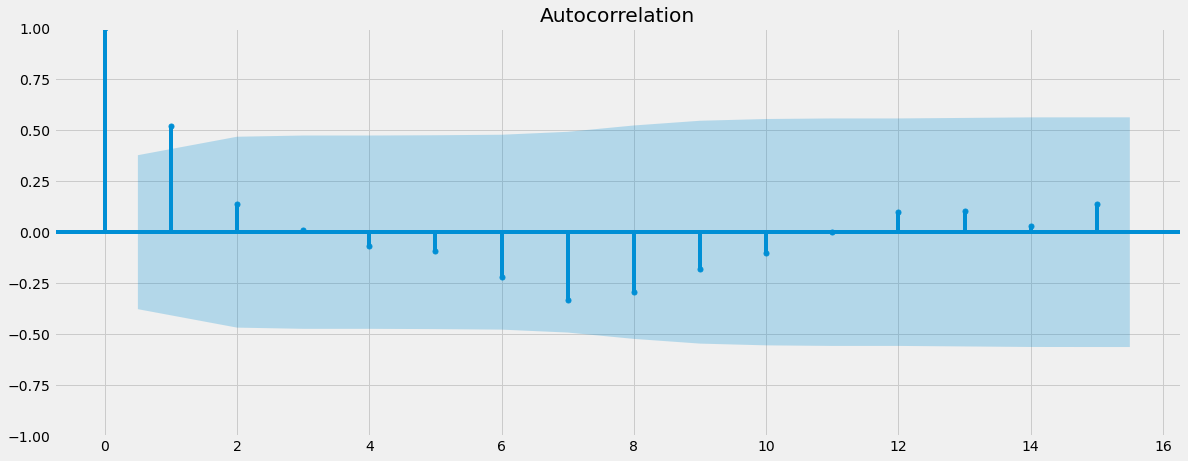

In [40]:
# Plot autocorrelation of data
plot_acf(data)
plt.show()

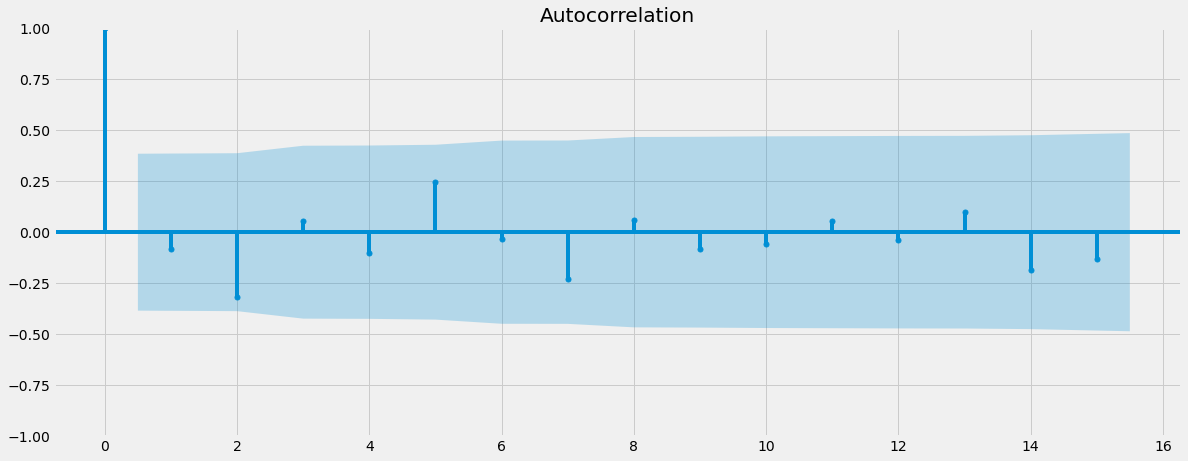

In [41]:
# Plot autocorrelations of differenced data
plot_acf(data_diff)
plt.show()

The differenced time series has very few (i.e. only one) lag correlated with itself. There is very little autocorrelation in this data. The original data has more lags autocorrelated with themselves, but still, very few, therefore the stationarity is somewhat weak.

This data would benefit from multivariate time series analysis, and forecasting of the multivariate analysis would be more beneficial to the study than forecasting of this single variable. However, the data is limited by the fact that it only has 27 observations - at least twice as many observations would be needed for effective forecasting (univariate or multivariate). 